In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Question
* Predict conversion rate
* Come up with recommendations for the product team and the marketing team to improve conversion rate

# 1.Data structure

In [2]:
df=pd.read_csv('/Users/xiaoxuchen/Downloads/DS_interview/DS_take_home_challege/dataset_book/conversion_project.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
df.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


Some observations:

1. The convension rate is around 3%.

2. The maximum age is 123, which is weird. We need more investigation.

3. This site is probably a US site, based on the high frequency of "US" in variable country.

4. User base is pretty young with average age of around 30.

In [5]:
df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

unique count of values in each column and show the top five frequent used values in each column

In [6]:
for col in df.columns:
    uniques=df[col].unique()
    print('{0:20s} {1:5d}\t'.format(col,len(uniques)),df[col].value_counts(ascending=False).index[:5].tolist())
# {1:5d}takes an integer argument and assigns a minimum width of 5

country                  4	 ['US', 'China', 'UK', 'Germany']
age                     60	 [30, 28, 29, 27, 26]
new_user                 2	 [1, 0]
source                   3	 ['Seo', 'Ads', 'Direct']
total_pages_visited     29	 [2, 3, 4, 1, 5]
converted                2	 [0, 1]


# 2. remove outlier

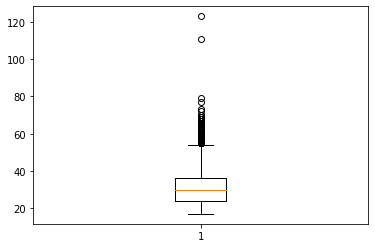

In [7]:
plt.boxplot(df.age)
plt.show()

In [8]:
# 2 outliers above the age 100, so we remove it
df = df[df.age<100]

# 3. Exploratory Data Analysis

## 3.1 numeric column

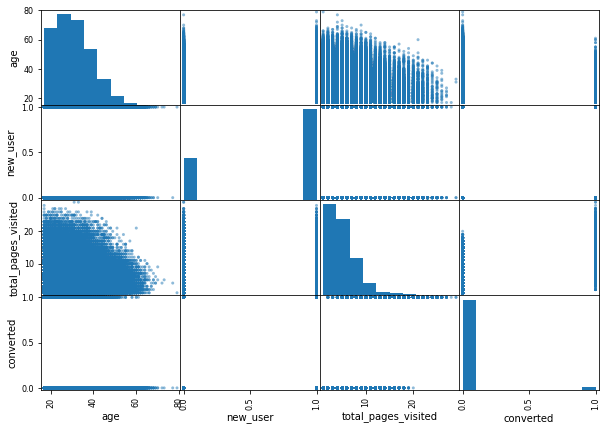

In [9]:
#pairplot between numeric columns
scatter=pd.plotting.scatter_matrix(df,figsize=(10,7))

In [10]:
def plot_numeric_col(col):
    grouped = df.groupby(col)['converted'].mean().reset_index()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.histplot(df[df['converted'] == 0][col], label='Converted 0', 
                ax=ax[0],kde=True, stat="density", linewidth=0 ,color='blue')
    sns.histplot(df[df['converted'] == 1][col], label='Converted 1', 
                ax=ax[0],kde=True, stat="density", linewidth=0 ,color='orange')
    ax[0].set_title('Distribution of '+col+' by Conversion' , fontsize=16)
    ax[0].legend()
    ax[1].plot(grouped[col], grouped['converted'], '.-')
    ax[1].set_title('Mean Conversion Rate vs '+col, fontsize=16)
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Mean convertion rate')
    ax[1].grid(True)
    plt.show()

conversion rate decrease while age increase, but the age of 60 particulary like to stay

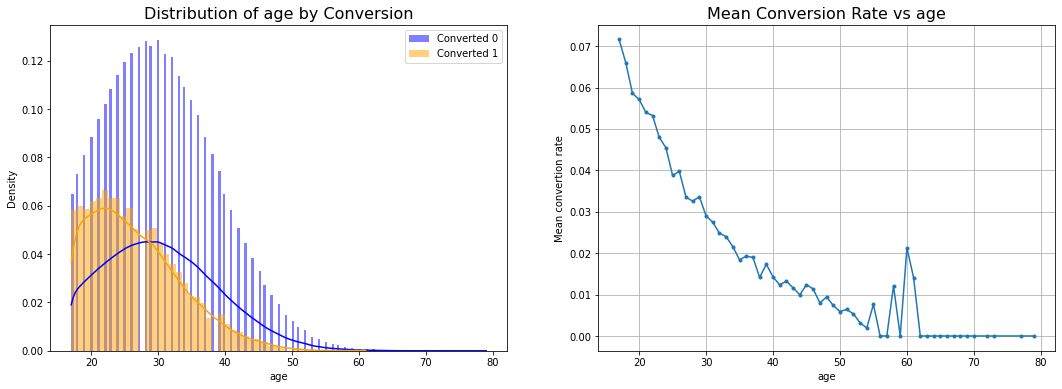

In [11]:
# Visualization of different ages
plot_numeric_col('age')

when customer visit pages more than 10, the conversion rate starts to increase

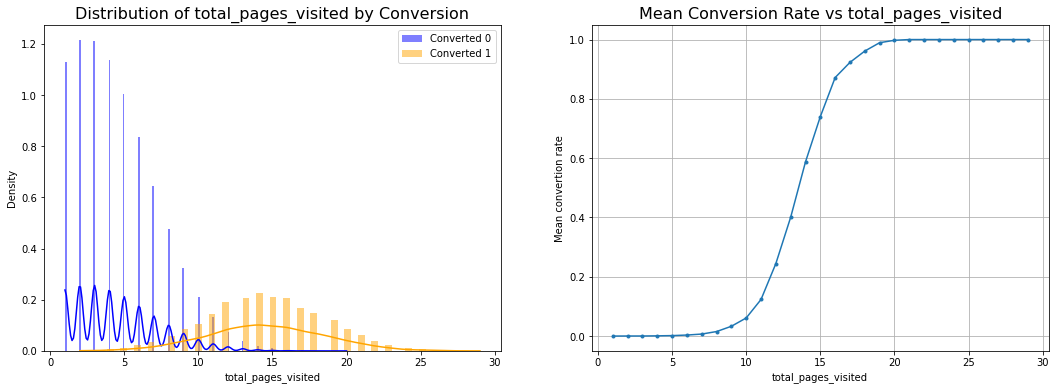

In [12]:
# Visualization of total_pages_visited
plot_numeric_col('total_pages_visited')

## 3.2 categorical column

China is most likely to convert; contrast to US, which is most likely to stay

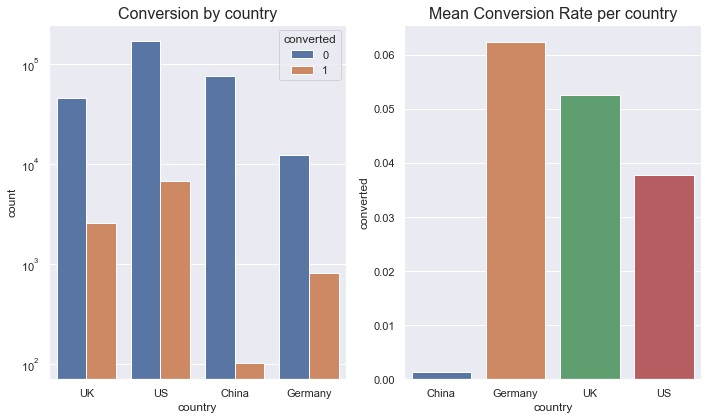

In [13]:
def plot(col):
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
    grouped = df.groupby(col)['converted'].mean().reset_index()
    sns.countplot(x=col, hue='converted', data=df, ax=ax[0])
    ax[0].set_title('Conversion by '+col, fontsize=16)
    ax[0].set_yscale('log') #scale to log
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')

    sns.barplot(x=col, y='converted', data=grouped, ax=ax[1]);
    ax[1].set_title('Mean Conversion Rate per '+col, fontsize=16)
    plt.tight_layout()
    plt.show()
# Visualization of different countries    
plot('country')

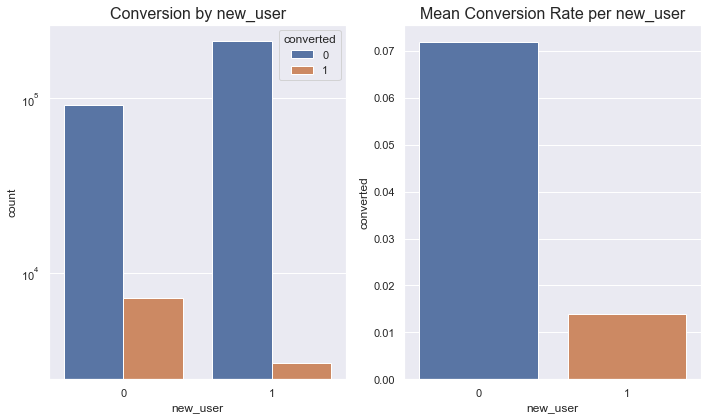

In [14]:
# Visualization of different user types
plot('new_user')

most people stay are clicked by ads and then search, the last is directly by url, but search are easy to stay, compared with the rest 2

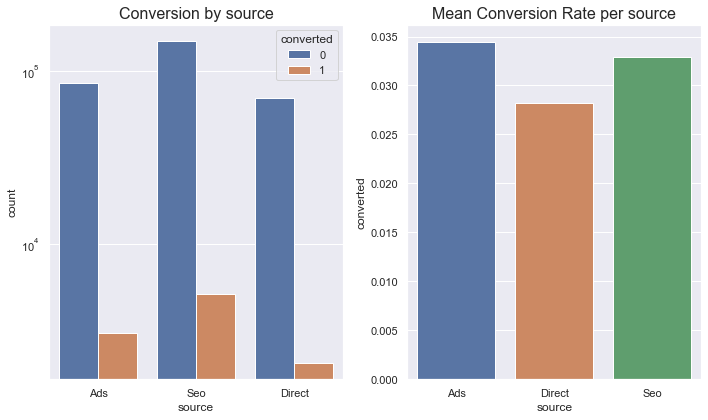

In [15]:
# Visualization of different sources
plot('source')

# 4. Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, df['converted'], test_size=0.2, 
                                                    shuffle=True, random_state=42)
                                

### drop target column 'converted'

In [17]:
x_train = x_train.drop('converted',axis=1)

## 4.1 standarize numeric column

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline =Pipeline([
    ('std_scaler',StandardScaler()), #name,function
])
# drop categorical columns to get only numeric dataframe
df_num= x_train.drop(['country', 'source'],axis=1)

df_num_transform =num_pipeline.fit_transform(df_num) 
df_num_transform

array([[-0.19066669, -1.47569127, -0.86127037],
       [ 1.98432423,  0.67764852, -0.56158876],
       [ 0.41349745, -1.47569127, -0.56158876],
       ...,
       [ 1.13849443,  0.67764852,  0.63713765],
       [-0.91566367, -1.47569127, -1.16095197],
       [ 0.41349745,  0.67764852, -0.86127037]])

In [19]:
df_num_transform.shape

(252958, 3)

## 4.2 recode categorical column

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse=False) 
housing_cat_1hot=cat_encoder.fit_transform(x_train[['country','source']])
housing_cat_1hot
cat_encoder.categories_

[array(['China', 'Germany', 'UK', 'US'], dtype=object),
 array(['Ads', 'Direct', 'Seo'], dtype=object)]

## 4.2 combine categorical columns into whole standarize dataframe

In [21]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,df_num.columns.to_list()),
    ('cat',OneHotEncoder(),['country', 'source']) #name,function,lists of data
])
df_prepared=full_pipeline.fit_transform(x_train)
df_prepared

array([[-0.19066669, -1.47569127, -0.86127037, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.98432423,  0.67764852, -0.56158876, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.41349745, -1.47569127, -0.56158876, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.13849443,  0.67764852,  0.63713765, ...,  1.        ,
         0.        ,  0.        ],
       [-0.91566367, -1.47569127, -1.16095197, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.41349745,  0.67764852, -0.86127037, ...,  1.        ,
         0.        ,  0.        ]])

In [22]:
df_prepared.shape

(252958, 10)

### change array to dataframe

In [23]:
x_train_prepared=pd.DataFrame(
    df_prepared,
    columns=df_num.columns.values.tolist()+cat_encoder.categories_[0].tolist()+cat_encoder.categories_[1].tolist(),index=df_num.index)
x_train_prepared.head()

,age,new_user,total_pages_visited,China,Germany,UK,US,Ads,Direct,Seo
105624,-0.190667,-1.475691,-0.861270,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55853,1.984324,0.677649,-0.561589,1.0,0.0,0.0,0.0,0.0,0.0,1.0
150261,0.413497,-1.475691,-0.561589,0.0,0.0,0.0,1.0,0.0,1.0,0.0
226667,1.863491,0.677649,-0.861270,0.0,0.0,0.0,1.0,1.0,0.0,0.0
206696,2.105157,0.677649,-0.861270,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
x_test = x_test.drop('converted',axis=1)
x_test_prepared = full_pipeline.transform(x_test)

In [25]:
df_num_test= x_test.drop(['country', 'source'],axis=1)
x_test_prepared=pd.DataFrame(
    x_test_prepared,
    columns=df_num.columns.values.tolist()+cat_encoder.categories_[0].tolist()+cat_encoder.categories_[1].tolist(),index=df_num_test.index)
x_test_prepared.head()

,age,new_user,total_pages_visited,China,Germany,UK,US,Ads,Direct,Seo
295399,-0.794831,-1.475691,-1.160952,0.0,0.0,0.0,1.0,0.0,0.0,1.0
82963,1.138494,0.677649,-0.861270,0.0,0.0,1.0,0.0,0.0,0.0,1.0
178212,-1.036496,-1.475691,0.337456,1.0,0.0,0.0,0.0,1.0,0.0,0.0
166533,0.655163,0.677649,1.236501,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11071,-0.915664,-1.475691,0.337456,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [26]:
x_test_prepared.shape

(63240, 10)

# 5. feature selection

## 5.1 relationship btw features and target 

## 5.2 relationship btw features

# 6. select model

accuracy_score simply returns the percentage of labels you predicted correctly (i.e. there are 1000 labels, you predicted 980 accurately, i.e. you get a score of 98%.

balanced_accuracy_score however works differently in that it returns the average accuracy per class, which is a different metric. Say your 1000 labels are from 2 classes with 750 observations in class 1 and 250 in class 2. If you miss-predict 10 in each class, you have an accuracy of 740/750= 98.7% in class 1 and 240/250=96% in class 2 balanced_accuracy_score would then return (98.7%+96%)/2 = 97.35%

In [ ]:
#in class LazyClassifier, it includes the standardize process  
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 17/17 [02:35<00:00,  9.16s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
MLPClassifier,0.99,0.85,0.85,0.99,7.37
LGBMClassifier,0.99,0.85,0.85,0.99,0.65
XGBClassifier,0.99,0.84,0.84,0.99,4.26
LogisticRegression,0.99,0.84,0.84,0.99,0.45
LogisticRegressionCV,0.99,0.84,0.84,0.99,3.60
AdaBoostClassifier,0.99,0.84,0.84,0.99,3.24
GradientBoostingClassifier,0.99,0.84,0.84,0.99,10.82
RandomForestClassifier,0.99,0.84,0.84,0.98,7.44
BaggingClassifier,0.98,0.84,0.84,0.98,1.85


from running time and balanced accuracy, logisticregression is best suitable

In [27]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x_train_prepared, y_train)
LogReg.score(x_test_prepared, y_test)


0.9865591397849462

In [28]:
LogReg.score(x_train_prepared, y_train)

0.9860885996884858

In [29]:
from sklearn.metrics import confusion_matrix
ypred = LogReg.predict(x_test_prepared)
# Confusion matrix: tells us Type I and Type II errors. 
confusion_matrix = confusion_matrix(y_test, ypred)
confusion_matrix

array([[60983,   222],
       [  628,  1407]])

In [30]:
from sklearn.metrics import classification_report
ytest_predict = LogReg.predict(x_test_prepared)
print(classification_report(y_true=y_test,y_pred=ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.86      0.69      0.77      2035

    accuracy                           0.99     63240
   macro avg       0.93      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240



from above, we know for "label=converted", if we use the default cutoff 0.5, we can have a high precision (0.86), but a not very good recall 0.69, which means we classify 32% converted user as non-converted.

since our task is giving Sales team and Marking team some insights, so we don't need to tune the cutoff value now, since that won't affect the model. however, if, for example, if we care more about not losing a valued customer, so incorrectly classifing a converted user as non-converted will pay much, we need to lower down the cut-off probability to be 1, which will increase the recall with the price lower than precision.
since this is an imbalanced classification problem, if we group every record as 'NOT converted', we can still get 96.78 accuracy (1-y_test.mean()). since our LR model produces an accurancy as 98.65% on test dataset(LogReg.score(x_test_prepared, y_test)), which indicates it is a model which makes sense.

In [31]:
feat_importances = pd.DataFrame({"name":x_train_prepared.columns,"coef":LogReg.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,China,-2.605916,2.605916
2,total_pages_visited,2.530670,2.530670
4,Germany,1.121467,1.121467
5,UK,0.931626,0.931626
1,new_user,-0.808638,0.808638
0,age,-0.615412,0.615412
6,US,0.552160,0.552160
8,Direct,-0.106264,0.106264
7,Ads,0.053237,0.053237
9,Seo,0.052364,0.052364


from above model, we can draw below conclusion:

1. conversion among China users are very bad. from inspection, we know that there are lot of users coming from China, but their conversion rate is very low. Consider China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate. we should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.

2. conversion from Germany is good, and then followed by UK. But via inspection, we know that there isn't a lot of users from German. so it's a huge opportuntity for us to target German users. for example, put more advertisement in German.

3. old users have better conversion rate. we should keep touch with them, for example, send promotion email or coupons to old users.

4. age is a negative factor. the older the user is, the less likely he/she will convert. then we should figure out why young people loves the web pages and strengthen it. and also find out why older people doesn't like our web pages, and try to correct it.

5. total_pages_visited is a positive factor. the longer the user browse our web page, the more likely he/she will convert and buy something.especially when they view the pages more than 10. then if we find some user browse a lot and didn't buy anything, we can send email to remaind them.